In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#it has 25,000 movie reviews for training and 25,000 for testing, labeled positive or negative (0 or 1).
from tensorflow.keras.datasets import imdb
#Makes sure all input sequences (text reviews) are of the same length 
from tensorflow.keras.preprocessing.sequence import pad_sequences
#You're building a model layer-by-layer
from tensorflow.keras.models import Sequential
"""Layers:
Embedding: Converts integer-encoded words into dense vectors (word embeddings).
LSTM: The core of the model — processes sequences and remembers important parts.
Bidirectional: Wraps around LSTM to read sequences forward and backward → improves context understanding.
Dense: Final layer for binary classification (positive or negative).
Dropout: Prevents overfitting by randomly turning off neurons during training.
"""
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
# Load IMDB dataset with top 10,000 most frequent words
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [16]:
# Define the BiLSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),#Word to Vector
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')#This is a single neuron that outputs a number between 0 and 1.
])

# Build model to calculate parameters
model.build(input_shape=(None, maxlen))
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#adam=Adaptive Moment Estimation


C:\Users\Yashaswini K M\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    x_train, y_train,              # your training data
    validation_split=0.2,          # 20% of it used to "test" the model during training
    epochs=5,                      # do 5 rounds of learning
    batch_size=64                  # learn using 64 reviews at a time
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 336ms/step - accuracy: 0.6788 - loss: 0.5774 - val_accuracy: 0.8406 - val_loss: 0.3725
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 286ms/step - accuracy: 0.8548 - loss: 0.3570 - val_accuracy: 0.8468 - val_loss: 0.3674
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 282ms/step - accuracy: 0.8696 - loss: 0.3140 - val_accuracy: 0.8364 - val_loss: 0.3784
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 289ms/step - accuracy: 0.9027 - loss: 0.2554 - val_accuracy: 0.8000 - val_loss: 0.4526
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 286ms/step - accuracy: 0.8674 - loss: 0.3070 - val_accuracy: 0.8530 - val_loss: 0.3876


In [22]:
loss, accuracy = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8457 - loss: 0.4053

Test Accuracy: 0.8464000225067139


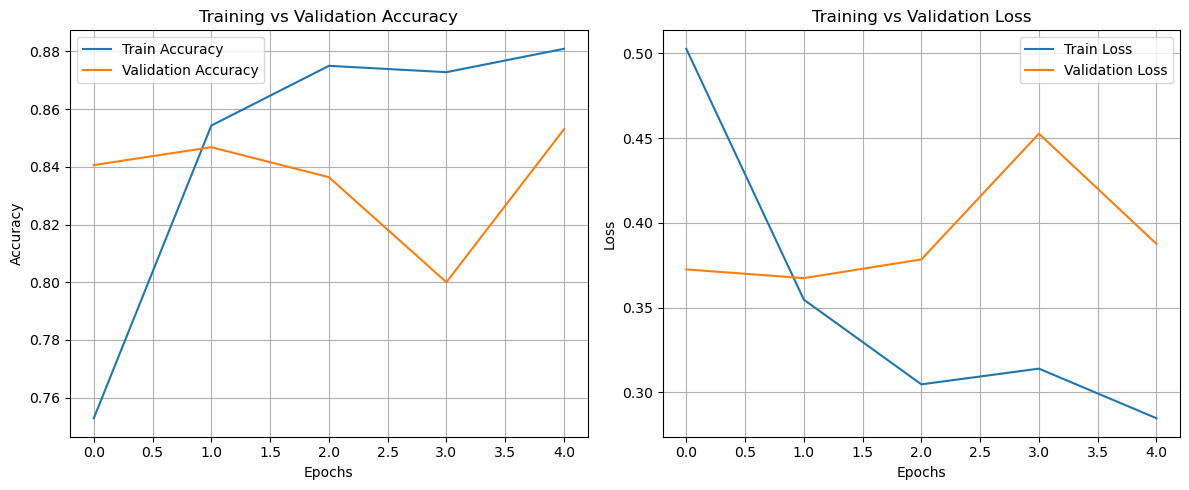

In [23]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step


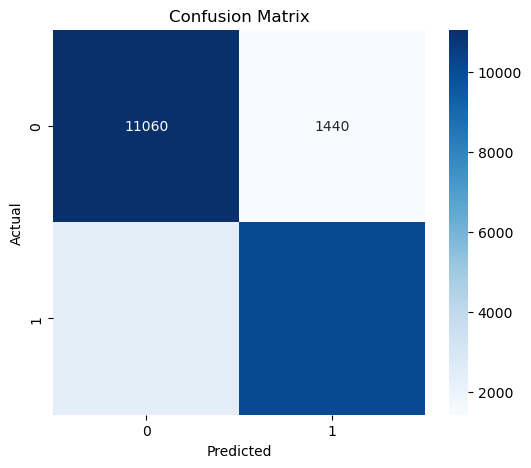


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12500
           1       0.88      0.81      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [24]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [27]:
import pandas as pd
import numpy as np

# Predict on test data
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Create DataFrame
pred_df = pd.DataFrame({
    "Actual": y_test.flatten(),
    "Predicted": y_pred.flatten(),
    "Predicted_Prob": y_pred_probs.flatten()
})

# Save to CSV
pred_df.to_csv("bilstm_predictions.csv", index=False)

print("Predictions saved to 'bilstm_predictions.csv'")


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step
Predictions saved to 'bilstm_predictions.csv'


In [28]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the word index used by IMDB dataset
word_index = imdb.get_word_index()

# Function to convert text into sequence of integers
def preprocess_input_text(text, vocab_size=10000, maxlen=200):
    tokens = text.lower().split()
    sequence = []
    for word in tokens:
        index = word_index.get(word)
        if index is not None and index < vocab_size:
            sequence.append(index + 3)  # Add 3 because IMDB reserves 0,1,2 for special tokens
    return pad_sequences([sequence], maxlen=maxlen)


In [29]:
while True:
    review = input("\nEnter a movie review (or type 'exit' to quit):\n")
    if review.lower() == 'exit':
        break

    processed = preprocess_input_text(review)
    prediction = model.predict(processed)[0][0]
    print("\n🔍 Sentiment Prediction:")
    print("Probability:", round(float(prediction), 4))
    print("Result:", "😊 Positive Review" if prediction > 0.5 else "😞 Negative Review")



Enter a movie review (or type 'exit' to quit):
 Absolutely loved this movie! The acting was brilliant and the story was very touching.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

🔍 Sentiment Prediction:
Probability: 0.9041
Result: 😊 Positive Review



Enter a movie review (or type 'exit' to quit):
 I was really disappointed. The plot made no sense and the acting was horrible


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

🔍 Sentiment Prediction:
Probability: 0.1159
Result: 😞 Negative Review



Enter a movie review (or type 'exit' to quit):
 exit
